In [2]:
import pandas as pd

data=pd.read_csv("D:/yahiya/workshop/diabetes2.csv")

<Axes: >

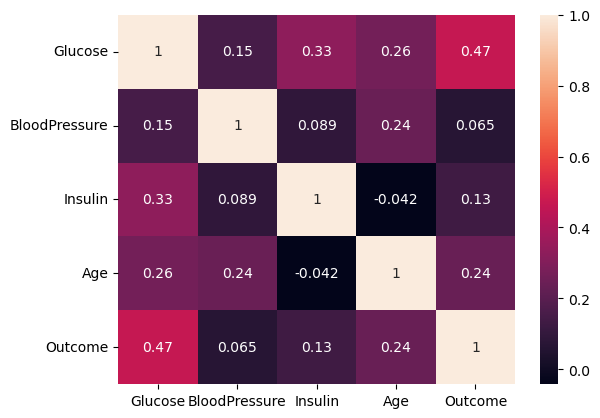

In [4]:
import seaborn as sns

sns.heatmap(data.corr(),annot=True)

In [22]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

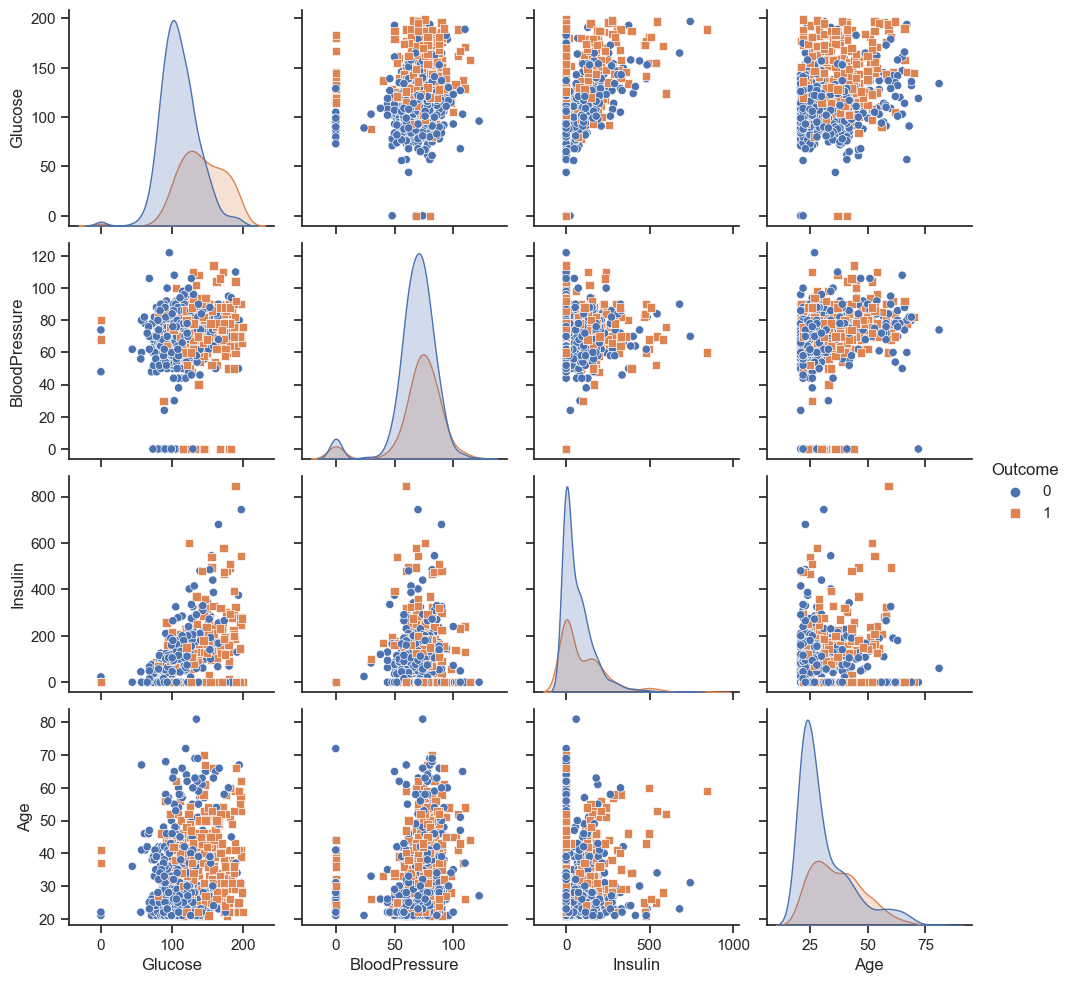

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks")
sns.pairplot(data, hue="Outcome", diag_kind="kde", markers=["o", "s"])

plt.show()


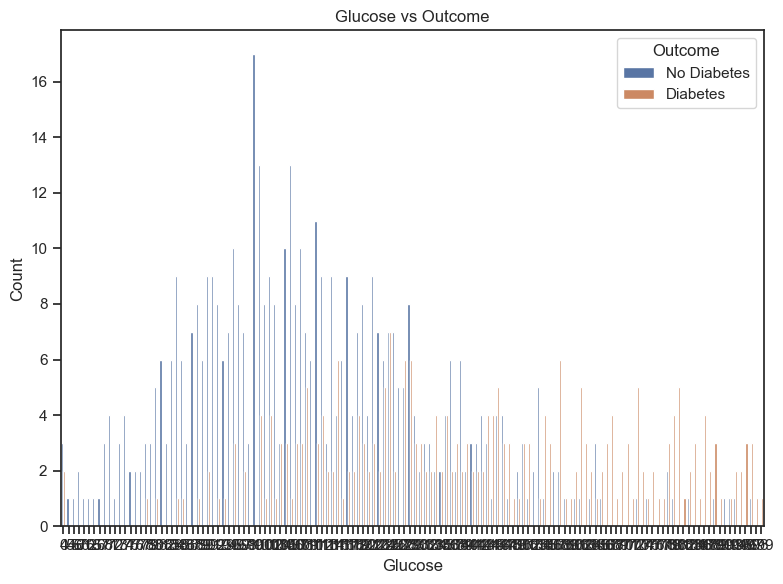

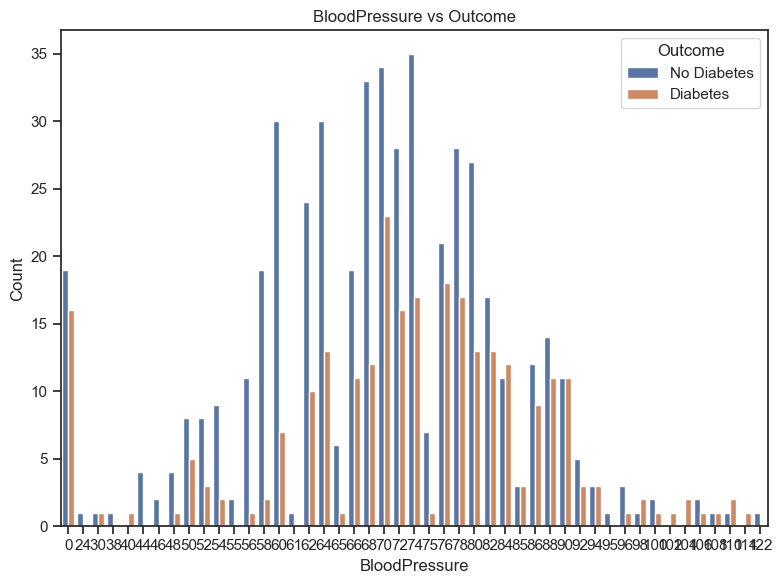

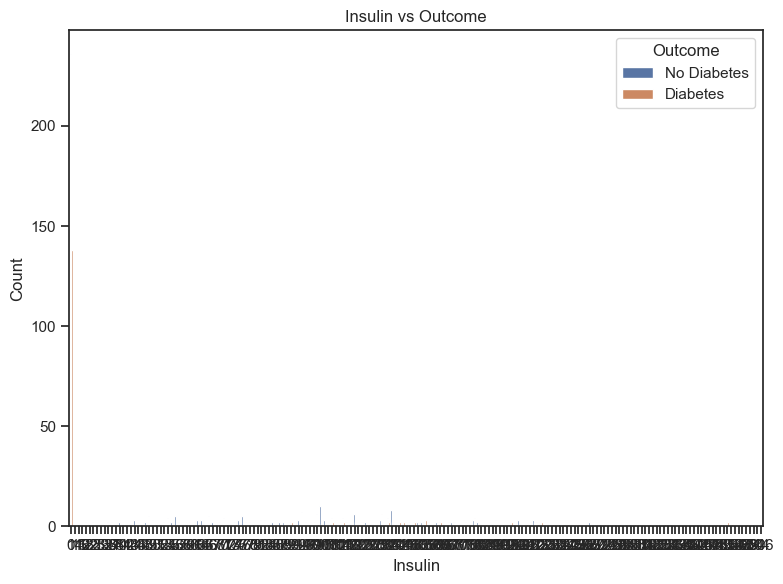

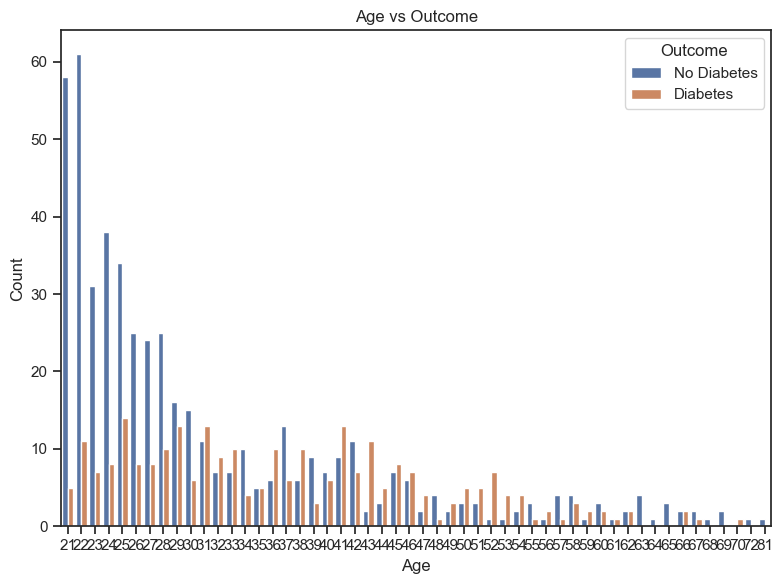

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for cat_col in x:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_col, data=data, hue='Outcome')
    plt.title(f'{cat_col} vs Outcome')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
    plt.tight_layout()
    plt.show()


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac  

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)


print("TRAINiNG DATA ACCURACY")
print("Logistic Regression:",ac(y_train,model1.predict(x_train))*100)
print("DecisionTreeClassifier:",ac(y_train,model2.predict(x_train))*100)
print("RandomForestClassifier:",ac(y_train,model3.predict(x_train))*100)
print('------------------------------------------------')
print("TEST DATA ACCURACY")
print("Logistic Regression:",ac(y_test,model1.predict(x_test))*100)
print("DecisionTreeClassifier:",ac(y_test,model2.predict(x_test))*100)
print("RandomForestClassifier:",ac(y_test,model3.predict(x_test))*100)

TRAINiNG DATA ACCURACY
Logistic Regression: 74.2671009771987
DecisionTreeClassifier: 100.0
RandomForestClassifier: 100.0
------------------------------------------------
TEST DATA ACCURACY
Logistic Regression: 75.32467532467533
DecisionTreeClassifier: 74.67532467532467
RandomForestClassifier: 75.32467532467533


In [72]:
import numpy as np
outcome = {0: 'yes', 1: 'no'}

def logistic(Glucose,BloodPressure,Insulin,Age):
    new = np.array([[Glucose,BloodPressure,Insulin,Age]])
    return outcome[model1.predict(new)[0]]

def decision_tree(Glucose,BloodPressure,Insulin,Age):
    new = np.array([[Glucose,BloodPressure,Insulin,Age]])
    return outcome[model2.predict(new)[0]]

def random_forest(Glucose,BloodPressure,Insulin,Age):
    new = np.array([[Glucose,BloodPressure,Insulin,Age]])
    return outcome[model3.predict(new)[0]]

Glucose = int(input("Enter the Glucose level :"))
BloodPressure= int(input("Enter the BloodPressure level :"))
Insulin= int(input("Enter the Insulin level :"))
Age = int(input("Enter the Age :"))

outcome1 = logistic(Glucose,BloodPressure,Insulin,Age)
outcome2 = decision_tree(Glucose,BloodPressure,Insulin,Age)
outcome3 = random_forest(Glucose,BloodPressure,Insulin,Age)

print('The patient is diabetic (Logistic Regression) :', outcome1)
print('The patient is diabetic (DecisionTreeClassifier) :', outcome2)
print('The patient is diabetic (RandomForestClassifier) :', outcome3)

Enter the Glucose level :160
Enter the BloodPressure level :35
Enter the Insulin level :20
Enter the Age :39
The patient is diabetic (Logistic Regression) : no
The patient is diabetic (DecisionTreeClassifier) : no
The patient is diabetic (RandomForestClassifier) : no


D:\yahiya\anoconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\yahiya\anoconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\yahiya\anoconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


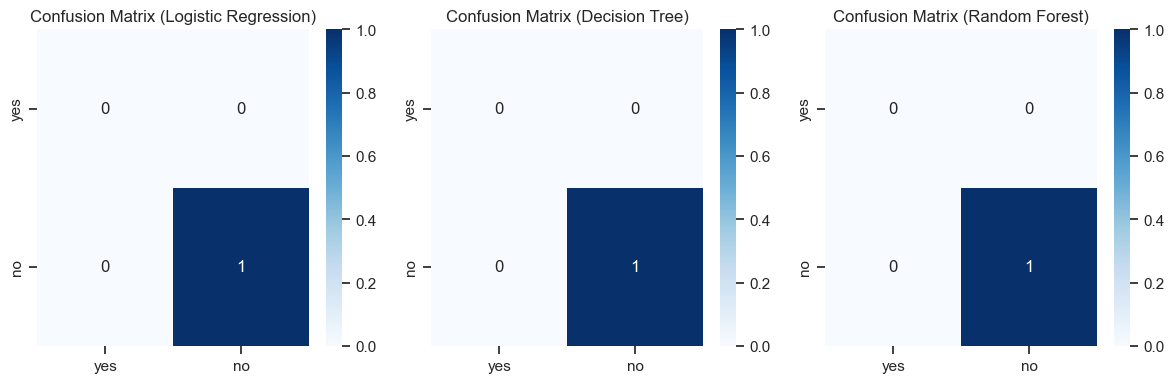

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_outcome = outcome[1]  

# Confusion matrices
conf_matrix1 = confusion_matrix([true_outcome], [outcome1], labels=list(outcome.values()))
conf_matrix2 = confusion_matrix([true_outcome], [outcome2], labels=list(outcome.values()))
conf_matrix3 = confusion_matrix([true_outcome], [outcome3], labels=list(outcome.values()))

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(conf_matrix1, annot=True, cmap="Blues", fmt="d", xticklabels=list(outcome.values()), yticklabels=list(outcome.values()))
plt.title("Confusion Matrix (Logistic Regression)")

plt.subplot(132)
sns.heatmap(conf_matrix2, annot=True, cmap="Blues", fmt="d", xticklabels=list(outcome.values()), yticklabels=list(outcome.values()))
plt.title("Confusion Matrix (Decision Tree)")

plt.subplot(133)
sns.heatmap(conf_matrix3, annot=True, cmap="Blues", fmt="d", xticklabels=list(outcome.values()), yticklabels=list(outcome.values()))
plt.title("Confusion Matrix (Random Forest)")

plt.tight_layout()
plt.show()